# Module 5.1 - NetCDF

Welcome to module 5.1! In this module we will explore NetCDF files. There are two main characteristics of NetCDF files: 
- They contain meta data
- They are multidimensional

We will look at these characteristics more closely during this module. 

## Opening a NetCDF file

But first, let's open a NetCDF dataset. For this we need a specific Python package, called `xarray`. From `xarray` we will use the function `xr.open_dataset()` to open a NetCDF file. 

In [1]:
import xarray as xr
ds = xr.open_dataset('temperatures.nc')

## 1. Exploring the metadata of a NetCDF file

Now that we have opened the NetCDF file and stored it into the variable `ds` (the abbreviation of dataset), we can explore the metadata. We can do this using the attributes of `ds`. Two useful attributes are:
- `ds.keys` gives us a summary of the most relevant information
- `ds.data_vars` gives us an overview of the data variables in this file, for our file this is only `air`

Let's try them out:

In [ ]:
ds.keys

In [ ]:
ds.data_vars

Using `ds.data_vars` we see that this NetCDF file only contains data called `air`. We can explore this data by executing the code `ds.air`. 
- Run the following code and click on `>Attributes: (11)`. Try to understand what is inside this dataset.

In [ ]:
ds.air

We see that the air dataset contains three dimension, namely `time`, `lat`, and `lon`, with lengths of respectively `886`, `360`, and `720`. This three dimensional dataset has in total over 200 million values. We can also observe that these values are montly means of surface temperature (see the attribute `long_name`) in degrees Kelvin (see the attribute `units`). 

So, we see that `ds.air` data is a 3D dataset, with dimensions `time`, `lat`, and `lon`. We can also take a look at the values of `time`, `lat`, and `lon`. These are the coordinates of the 3D dataset. 

**Exercise:** Take a look at the three dimensions by running the following three cells. For every dimension try to answer the following three questions:
1. What is the unit of the values?
2. What is the datatype of the values?
3. What is the lowest and the highest value?

In [ ]:
ds.time

In [ ]:
ds.lon

In [ ]:
ds.lat

Now that we have looked at the metadata we now what is inside the dataset: we have surface temperatures (the data values), for the years 1948 up to 2021 (the first dimension), for all longitudes (the second dimension) and all latitudes (the third dimension).

## 2. Accessing multidimensional data

Now that we have explored the metadata of our NetCDF file, we will now learn how to make selections out of this huge dataset. We will do this using **boolean slicing**. We have used boolean slicing before, mainly on dataframes. With dataframes we could select data in two dimensions: rows and columns. Using `.loc[]` we first made a selection for rows, and then a selection for columns, seperated by a comma. For example, `meteoData.loc[meteoData.Temp_Out > 20, 'Hum_Out']`. 

This time, however, instead of having two dimensions (rows and columns), we have three dimensions: `time`, `lat`, and `lon`. This means we can use three booleans expressions, seperated by a comma. Selecting data can be done like this:
```python
ds.air[booleans_for_selecting_time, booleans_for_selecting_longitudes, booleans_for_selecting_latitudes]
```
For example, if we want to select only the data for the years 2000 up to 2005, we can use the following code:

In [2]:
import pandas as pd

starttime = pd.to_datetime('2000')
endtime = pd.to_datetime('2006')
temps_2000_2005 = ds.air[(ds.time >= starttime) & (ds.time < endtime), :, :]

print('The data shape before selection:', ds.air.shape)
print('The data shape after selection:', temps_2000_2005.shape)

The data shape before selection: (886, 360, 720)
The data shape after selection: (72, 360, 720)


We used boolean expressions to select values from the `time` dimension and we selected all values from the `lon` dimension and the `lat` dimension (by using `:`). The selection was succesful, because we see that the first dimension has decreased in size. 

## Exercise - Selecting time periods

Now you will select part of data yourself. Assign the selection to a new variable and check the shape of the variable using the attribute `.shape`. If the selection was successful, the shape should be the same as the shape mention in the exercise. 

Using the dataset `ds.air`, select the following time periods:

1. The years 2010 to 2015, shape of selection: `(72, 360, 720)`
2. Only the year 1950, shape of selection: `(12, 360, 720)`
3. From January 2017 to March 2020, shape of selection: `(39, 360, 720)`

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

Instead of selecting only time periods, we can also select countries. For this we need the longitude and latitude boundaries in which the country is located. For example, the boundaries of Ethiopia are: 
```python 
latmin = 3
latmax = 16
lonmin = 32
lonmax = 48
```
Just as with time, we can use the values in `ds.lon` and `ds.lat` for boolean slicing. To select the data for only Ethiopia, we want only the temperatures for which the latitude is larger than `latmin` and smaller than `latmax`, and for which the longitude is larger than `lonmin` and smaller than `lonmax`. This selection looks like this:

In [7]:
# Defining the boundaries
latmin = 3
latmax = 16
lonmin = 32
lonmax = 48

# Using the boundaries and the values of ds.lon and ds.lat to select Ethiopia
temps_ethiopia = ds.air[:, (ds.lat > latmin) & (ds.lat < latmax), (ds.lon > lonmin) & (ds.lon < lonmax)]

print('The data shape before selection:', ds.air.shape)
print('The data shape after selection:', temps_ethiopia.shape)

The data shape before selection: (886, 360, 720)
The data shape after selection: (886, 26, 32)


Now we see that length of the `time` dimension has not changed, and that the length of the dimensions `lat` and `lon` have decreased. 

## Exercise - Selecting regions

Now you will try this yourself. Just as in the previous exercise, assign the selection to a new variable and check the shape of the variable using the attribute `.shape`. If the selection was successful, the shape should be the same as the shape mention in the exercise.

Using the dataset ds.air, select the following regions:

1. North-America 
    - `latmin = 7`, `latmax = 85`, `lonmin = 210`, `lonmax = 310`
    - Shape of selection: `(886, 156, 200)`
2. Europe 
    - `latmin = 35`, `latmax = 60`, `lonmin = 0`, `lonmax = 36`
    - Shape of selection: `(886, 50, 72)`
3. Italy 
    - `latmin = 35`, `latmax = 46`, `lonmin = 7`, `lonmax = 20`
    - Shape of selection: `(886, 22, 26)`

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

Now that we know how to select both time periods and regions, we can also combine these two selections. For example, we can select the surface temperatures of Ethiopia for the years 2010 to 2020. One way to do this:

In [5]:
# Selecting the years 2010 to 2020
starttime = pd.to_datetime('2010')
endtime = pd.to_datetime('2021')
temps_2010_2020 = ds.air[(ds.time >= starttime) & (ds.time < endtime), :, :]

# Selecting Ethiopia
latmin = 3
latmax = 16
lonmin = 32
lonmax = 48

temps_2010_2020_ethiopia = temps_2010_2020[:, (ds.lat > latmin) & (ds.lat < latmax), (ds.lon > lonmin) & (ds.lon < lonmax)]

print('The data shape before selection:', ds.air.shape)
print('The data shape after selection:', temps_2010_2020_ethiopia.shape)

The data shape before selection: (886, 360, 720)
The data shape after selection: (132, 26, 32)


## Exercise - Selecting time periods and regions

1. The temperatures in North-America for the year 2019 
    - `latmin = 7`, `latmax = 85`, `lonmin = 210`, `lonmax = 310`
    - Shape of selection: `(12, 156, 200)`
2. The temperatures in Europe for the years 1980 to 1990 
    - `latmin = 35`, `latmax = 60`, `lonmin = 0`, `lonmax = 36`)
    - Shape of selection: `(132, 50, 72)`


In [ ]:
#1

In [ ]:
#2

## 3. Mathematics on multidimensional data

Now that we know how to select data, we can also do calculations on the selections. This can be done using functions from the package `numpy`. In module 3 we have worked with some `numpy` functions like `np.max()`, `np.min()` and `np.mean()`.

Conveniently, with `numpy` functions we can choose the dimension(s) on which we want to do the calculations, by using the argument `axis=` inside the function. 

For example, if we have selected the region of Ethiopia and we want to calculate what the average is of the temperature through the years, we can apply the `np.mean()` function on the `time` dimension. Since the `time` dimension is the first dimension, we will set the argument to `axis=0` (the first dimension has index 0).  

In [8]:
# We use temps_ethiopia from an example above
import numpy as np
temps_ethiopia_time_mean = np.mean(temps_ethiopia, axis=0)

print('Shape of temps_ethiopia before taking the mean:', temps_ethiopia.shape)
print('Shape of temps_ethiopia after taking the mean:', temps_ethiopia_time_mean.shape)

Shape of temps_ethiopia before taking the mean: (886, 26, 32)
Shape of temps_ethiopia after taking the mean: (26, 32)


We see that the `time` dimension has disappeared because of taking the mean. The `lat` and `lon` dimensions remained the same.

When you have data with only lat and lon dimensions, xarray files have a built-in function `.plot()` by which you can easily plot the data. We will use this on our average temperatures of Ethiopia. 

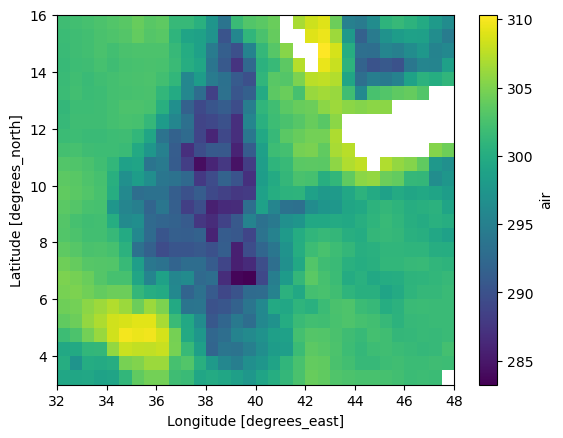

In [12]:
temps_ethiopia_time_mean.plot()

Instead of taking the average over the `time` dimension, we can also take the average over the `lat` and `lon` dimensions. To do this we must use these two dimensions as input to the `axis=` argument. When you use multiple dimensions, you should put them into a tuple (a tuple is like a list, but with round brackets, e.g., `(1, 2, 3, 4)`).

In [10]:
temps_ethiopia_region_mean = np.mean(temps_ethiopia, axis=(1, 2))

print('Shape of temps_ethiopia before taking the mean:', temps_ethiopia.shape)
print('Shape of temps_ethiopia after taking the mean:', temps_ethiopia_region_mean.shape)

Shape of temps_ethiopia before taking the mean: (886, 26, 32)
Shape of temps_ethiopia after taking the mean: (886,)


As you can see, now the `lat` and `lon` dimensions have disappeared. Let's now also plot this data. Because we now only have one dimension left, the `.plot()` function will create a lineplot, showing the average temperature of Ethiopia over time. 

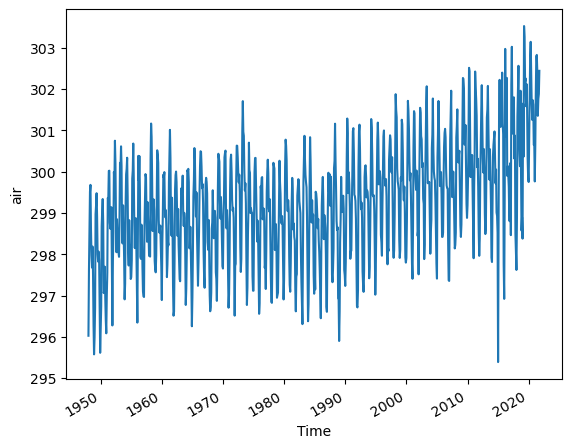

In [11]:
temps_ethiopia_region_mean.plot()

## Exercise - Mathematics on multidimensional data

1. South-America
    - Select the temperature data for the region South-America (-60, 20, 260, 345)
    - Calculate the maximum temperature over the `time` dimension, using `np.max(..., axis=...)`
    - Plot the data, using `data_selection.plot()`
2. India 
    - Select the region India (2, 40, 50, 100)
    - Calculate the mean over time
    - Plot the selection
3. Horn of Africa
    - Select the years 2000 to 2020
    - Select the region Horn of Africa (-3, 19, 30, 60)
    - Calculate the mean over the region (dimensions `lat` and `lon`)
    - Plot the selection 

In [ ]:
#1

In [ ]:
#2

In [ ]:
#3

## Additional exercise - Exploring unknown NetCDF files

On you computer you have the files `unknown1.nc` and `unknown2.nc`. These are NetCDF files, but the content is not known. Your task in this exercise is to explore these NetCDF file. We will start with the file `unknown1.nc`.

1. Open the NetCDF file using xarray and save it to a variable

In [ ]:
#1

2. Check what datasets are inside by using the attribute `.data_vars`

In [ ]:
#2

3. Investigate every dataset and for every dataset try to answer the following questions:
    - What kind of data is it? 
    - What are the data units?
    - What are the dimensions of the dataset? 

In [ ]:
#3

4. Choose one of the datasets and complete the following exercises for this dataset
5. Investigate the dimensions of the dataset. Try to answer the following questions:
    - What are the lengths of the dimensions?
    - What are the datatypes of the dimensions?
    - What are the highest and the lowest values of the dimensions?

In [ ]:
#5

6. Try to make one nice and relevant selection/calculation/plot using the dataset that you chose

In [ ]:
#6

Now, let's explore the second unknown NetCDF file, `unknown2.nc`. Again, do the following things:
1. Load the file
2. Check what datasets are inside
3. Explore the datasets
4. Try to make some meaningful calculations and plots

In [ ]:
# Your code here